- Começo da pandemia em Pernambuco: 12 de março de 2020.
- inicio da vacinação em pernambuco: 18 de Janeiro de 2021
- Pernambuco atinge 50% da população vacinável com imunização completa contra a Covid-19: 07/10/2021.

### Definições

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

class individual:
  def __init__(self, _alpha, _beta) -> None:
    self.alpha = _alpha
    self.beta = _beta
    self.assessment = 0
  def setAssessment(self, f): 
    self.assessment = f(self)
  def __str__(self):
    return f'α:{self.alpha}, β: {self.beta}, avaliação: {self.assessment}'


### Dados

In [2]:

# de 01/05/2020 à 31/05/2020
start = [7334,
         8145,
         8643,
         8863,
         9325,
         9881,
         10824,
         11587,
         12470,
         13275,
         13768,
         14309,
         14901,
         15588,
         16209,
         18488,
         19452,
         20094,
         21242,
         22560,
         23911,
         25760,
         26786,
         27759,
         28366,
         28854,
         29919,
         30713,
         32255,
         33427,
         34450
]

### Funções do algoritmo evolucionairo

In [3]:
import math

def classification(i, compare):
  def SIR(t,Y):
    S,I = Y
    dS = -i.alpha*S*I
    dI = i.alpha*S*I -i.beta*I
    return np.array([dS,dI], float)
  _solution = solve_ivp(SIR,[0,len(compare)],[1-compare[0][1],compare[0][1]],t_eval=np.linspace(0, len(compare), 1000))
  all_minimal_distance = []
  for j in compare:
    distance = [math.sqrt(math.pow(j[0] - jj[1],2) + math.pow(j[1] - _solution.y[1][jj[0]],2)) 
                for jj in enumerate(_solution.t)]
    all_minimal_distance.append(min(distance))
  return sum(all_minimal_distance)

evaluate = lambda i: classification(i,[[j[0],j[1]/9616621] for j in enumerate(start)])

def getBest(a):
  avaliation = [i.assessment for i in a]
  minimum = min(avaliation)
  index = avaliation.index(minimum)
  return a[index] 


### Algoritmo

In [4]:
import random

def auto():
    executionTime = 150

    generation = 20
    generation_size = 20
    precision = 0

    population = []
    population.append([individual(random.random(),random.random()) for i in range(generation_size)]) #Individuos iniciais

    b = 0
    for g in range(executionTime):
    #Avalia os individuos
        for i in population[g]:
            i.setAssessment(evaluate)
    #Seleciona o melhor individuo
        best = getBest(population[g])
    #Faz mutações no melhor individuo
        range_min_alpha = min(best.alpha, 1 - best.alpha)
        range_min_beta = min(best.beta, 1 - best.beta)
        population.append([
            individual(
                best.alpha+random.uniform(-range_min_alpha/math.pow(10,precision),range_min_alpha/math.pow(10,precision)),
                best.beta+random.uniform(-range_min_beta/math.pow(10,precision),range_min_beta/math.pow(10,precision))
            ) for i in range(generation_size-1)]+[best])
    
    #Atualiza as gerações
        if g%generation == 0 and g != 0:
            precision = precision + 1
        b = getBest(population[-2])
        if g == 1 and b.assessment >= 0.2:
            break
    return [b, b.alpha/b.beta]

In [5]:

entity,r0 = [],[]

amount = 16

while len(entity) < amount:
    a = auto()
    if (a[0].assessment - 0.240344) <=  0.000001:
        entity.append(a[0])
        r0.append(a[1])
    print(f'Entidades: {len(entity)}/{amount}')

# table = pd.DataFrame({'α': al,'β': bt, 'R0': r0})

Entidades: 0/16
Entidades: 1/16
Entidades: 2/16
Entidades: 3/16
Entidades: 4/16
Entidades: 4/16
Entidades: 5/16
Entidades: 5/16
Entidades: 5/16
Entidades: 6/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 7/16
Entidades: 8/16
Entidades: 8/16
Entidades: 8/16
Entidades: 9/16
Entidades: 9/16
Entidades: 10/16
Entidades: 10/16
Entidades: 11/16
Entidades: 11/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 12/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 13/16
Entidades: 14/16
Entidades: 15/16
Entidades: 15/16
Entidades: 15/16
Entidades: 15/16
Entidades: 15/16
Entidades: 16/16


In [6]:
import pandas as pd
al = [i.alpha for i in entity]
bt = [i.beta for i in entity]
av = [i.assessment for i in entity]
table = pd.DataFrame({'α': al,'β': bt,'av': av, 'R0': r0})
table.to_excel("01052020to31052020.xlsx")
table

,α,β,av,R0
0,0.650860,0.591142,0.240331,1.101021
1,0.602886,0.538812,0.240299,1.118917
2,0.900992,0.832638,0.240264,1.082094
3,0.731356,0.666229,0.240256,1.097756
4,0.381688,0.324675,0.240305,1.175600
5,0.786975,0.716910,0.240340,1.097731
6,0.278873,0.222290,0.240307,1.254542
7,0.120563,0.066516,0.240341,1.812532
8,0.204283,0.147812,0.240312,1.382045
9,0.829508,0.758976,0.240306,1.092930


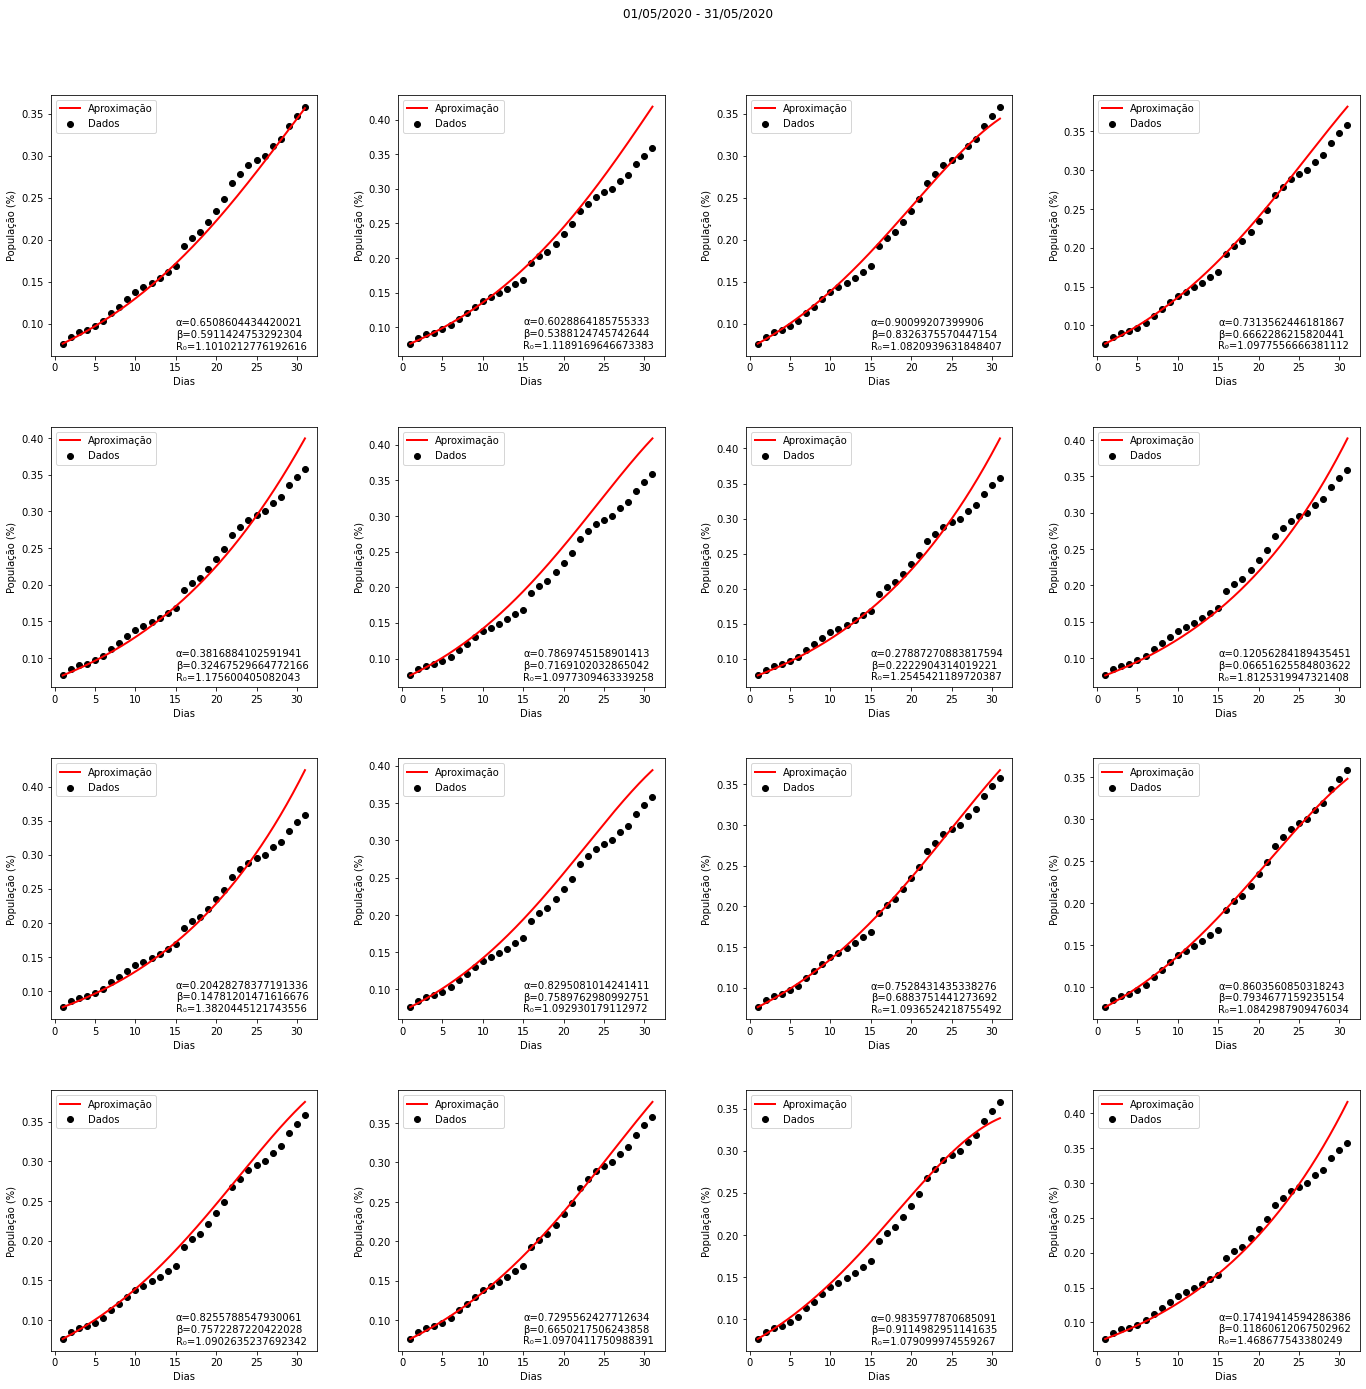

In [21]:
import matplotlib.pyplot as plt

y = [j/9616621 for j in start]

fig, ax = plt.subplots(len(entity)//4, 4, figsize=(20,20))
fig.suptitle('01/05/2020 - 31/05/2020')
fig.tight_layout(pad=5.0)
for i,jj in enumerate(list(zip(al,bt))):
  b = individual(jj[0],jj[1])

  def SIR(t,Y):
      S,I,R = Y
      dS = -b.alpha*S*I
      dI = b.alpha*S*I -b.beta*I
      dR = b.beta*I
      return np.array([dS,dI,dR], float)

  solution = solve_ivp(SIR,[0,len(y)],[1-y[0],y[0],0],t_eval=np.linspace(0, len(y), 1000))
  ax[i//4, i%4].plot(np.linspace(1, len(y), 1000),solution.y[1]*100, color="red",linewidth=2, alpha=1, label="Aproximação")
  ax[i//4, i%4].scatter(list(range(1,len(y)+1)), np.array(y)*100, color='black', label="Dados")
  ax[i//4, i%4].text(15,0.07,f'α={b.alpha}\nβ={b.beta}\nR₀={r0[i]}')
  ax[i//4, i%4].legend()
for a in ax.flat:
    a.set(xlabel='Dias', ylabel='População (%)')
plt.show()